In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(9)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2733,ham,Do Ì_ noe if ben is going?,NaN,NaN,NaN
4648,ham,Please protect yourself from e-threats. SIB ne...,NaN,NaN,NaN
4765,ham,Whens your radio show?,NaN,NaN,NaN
4981,ham,Slept? I thinkThis time ( &lt;#&gt; pm) is no...,NaN,NaN,NaN
1088,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN
1961,ham,LOL that would be awesome payback.,NaN,NaN,NaN
5260,ham,If anyone calls for a treadmill say you'll buy...,NaN,NaN,NaN
4756,ham,"hey, looks like I was wrong and one of the kap...",NaN,NaN,NaN
2438,ham,I not busy juz dun wan 2 go so early.. Hee..,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.duplicated().sum()

403

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

# EDA

In [17]:
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1648082d820>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')])

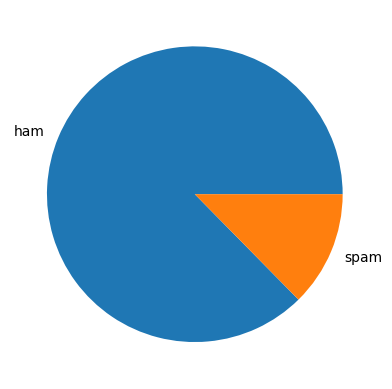

In [20]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'])

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#number of charcaters
df['num_characters']=df['text'].apply(len)

In [25]:
df.head(3)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [26]:
# number of words
df['num_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
                 

In [27]:
df.head(2)

,target,text,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [28]:
#number of sentences
df['num_of_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head(2)

,target,text,num_characters,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [31]:
df[['num_characters','num_of_words','num_of_sent']].describe()

,num_characters,num_of_words,num_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
df[df['target']==0][['num_characters','num_of_words','num_of_sent']].describe()

,num_characters,num_of_words,num_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
df[df['target']==1][['num_characters','num_of_words','num_of_sent']].describe()

,num_characters,num_of_words,num_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [34]:
 import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

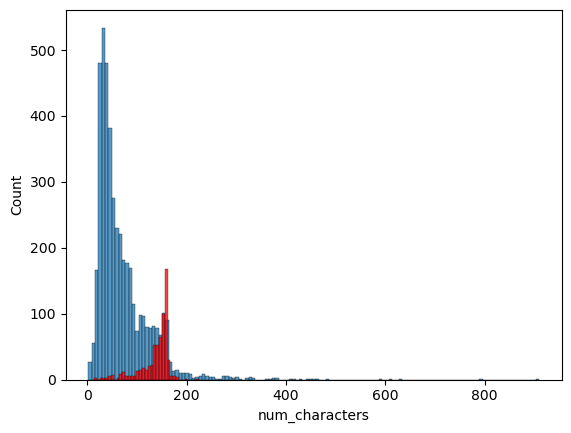

In [35]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<AxesSubplot:xlabel='num_of_words', ylabel='Count'>

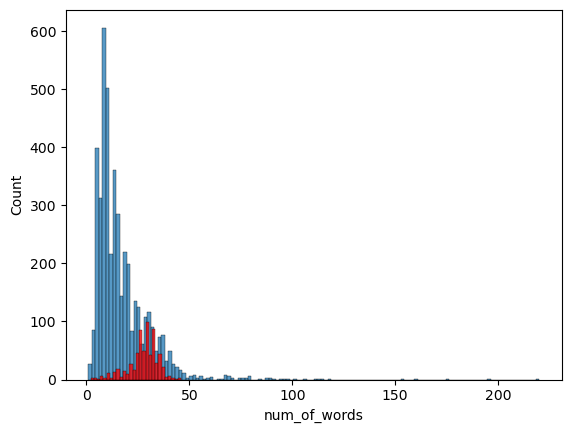

In [36]:
sns.histplot(df[df['target']==0]['num_of_words'])
sns.histplot(df[df['target']==1]['num_of_words'],color='red')


<AxesSubplot:>

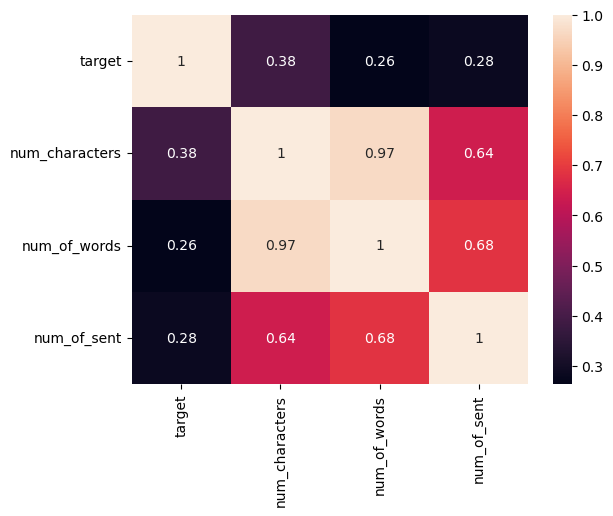

In [37]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

## lowercase

In [38]:
df['text'] = df['text'].apply(lambda x:x.lower())

In [39]:
df['text']=df['text'].apply(lambda x:nltk.word_tokenize(x))

In [40]:
def special_charcter(text):
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

In [41]:
special_charcter(['hi','bro','!','@'])

['hi', 'bro']

In [42]:
df['text']=df['text'].apply(special_charcter)

In [43]:
from nltk.corpus import stopwords

import string

In [44]:
def stopword(text):
    y=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y

In [45]:
stopword(['Did','you','Like','my','presentation','on','ML'])

['Did', 'Like', 'presentation', 'ML']

In [46]:
df['text']=df['text'].apply(stopword)

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [48]:
def stemming(text):
    y = []
    for i in text:
        y.append(ps.stem(i))
    return y

In [49]:
stemming(['I','Love','Heroes','how','do','about','you'])

['i', 'love', 'hero', 'how', 'do', 'about', 'you']

In [50]:
df['text']=df['text'].apply(stemming)

In [51]:
df['text']=df['text'].apply(lambda x:" ".join(x))

In [52]:
df.head(2)

,target,text,num_characters,num_of_words,num_of_sent
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [54]:
spam_wc_0 = wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))

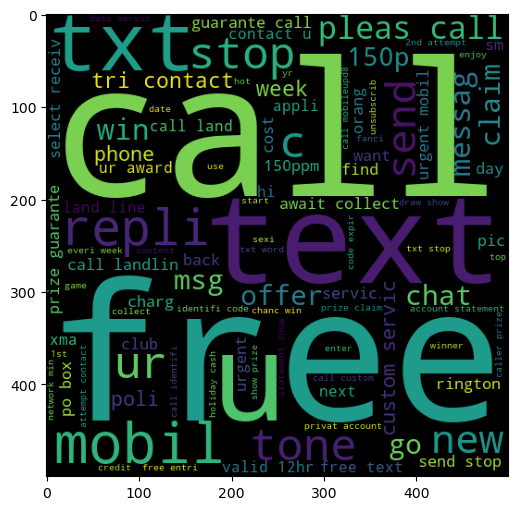

In [55]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc_0)

In [56]:
spam_wc = wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))

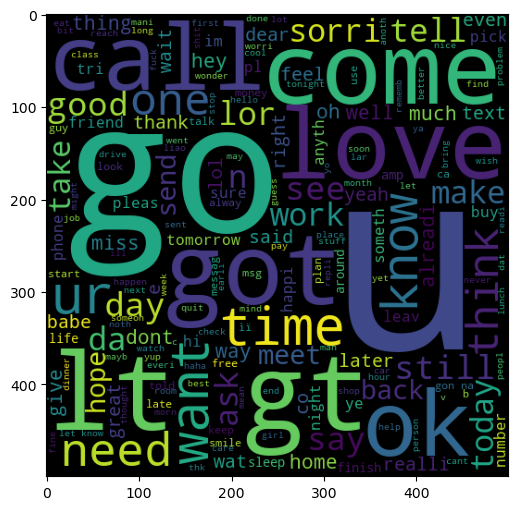

In [57]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [58]:
df.head(3)

,target,text,num_characters,num_of_words,num_of_sent
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2


In [59]:
spam=[]
for sent in df[df['target']==1]['text'].tolist():
         for word in sent.split():
            spam.append(word)
        

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

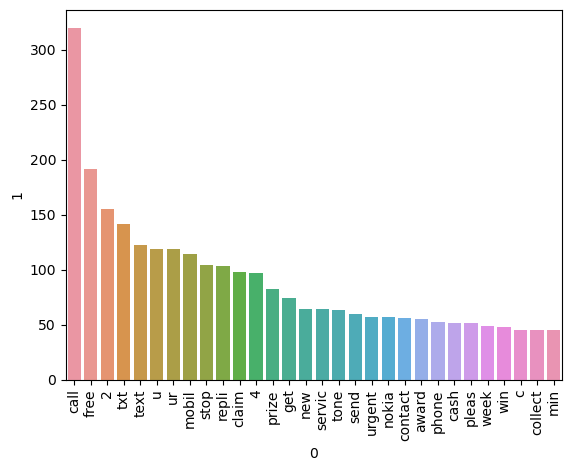

In [60]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam).most_common(30))[0] ,pd.DataFrame(Counter(spam).most_common(30))[1])
plt.xticks(rotation='vertical')

In [61]:
ham=[]
for sent in df[df['target']==1]['text'].tolist():
         for word in sent.split():
            ham.append(word)
        

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

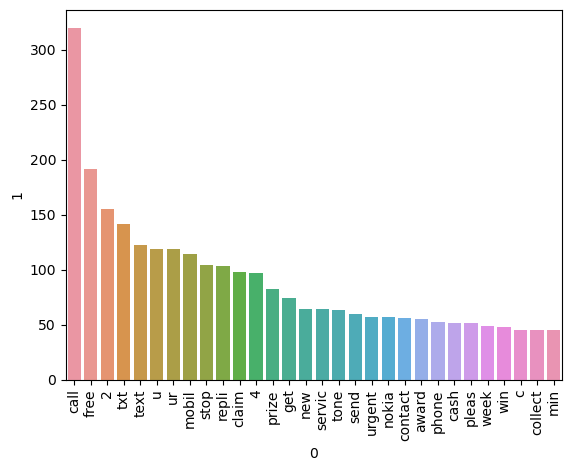

In [62]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham).most_common(30))[0] ,pd.DataFrame(Counter(ham).most_common(30))[1])
plt.xticks(rotation='vertical')

# Model Building

In [107]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [108]:
x = tfidf.fit_transform(df['text']).toarray()

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
x = scaler.

In [87]:
y = df['target'].values

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [89]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [97]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [111]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8713733075435203
[[790 117]
 [ 16 111]]
0.4868421052631579


In [110]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[907   0]
 [ 22 105]]
1.0


In [112]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[906   1]
 [ 16 111]]
0.9910714285714286


In [101]:
## tfidf with mnb

In [116]:
import pickle as pi
pi.dump(tfidf,open('vectorizer.pkl','wb'))
pi.dump(mnb,open('model.pkl','wb'))